In [1]:
# 공통 파트
import os

%matplotlib inline
import matplotlib.pyplot as plt

CURR_DIR = '.'
IMAGE_DIR = 'Images'
CHAPTER = 'Chap4'
IMAGE_PATH = os.path.join( CURR_DIR, IMAGE_DIR, CHAPTER )
os.makedirs( IMAGE_PATH, exist_ok = True )

def my_save_fig( fig_id, tight_layout = True, fig_extension = 'png', resolution = 300 ):
    path = os.path.join( IMAGE_PATH, fig_id + '.' + fig_extension )
    print( 'Save Figure : ', fig_id )
    if ( tight_layout ):
        plt.tight_layout()
    plt.savefig( path, format = fig_extension, dpi = resolution )

# 4.1 Linear Regression

In [2]:
import numpy as np

np.random.rand( r, c ) -> 0 ~ 1 사이의 Uniform Distribution에서 (r, c) Matrix 생성

np.random.randn( r, c ) -> Gaussian Normal Distribution에서 (r, c) Matrix 생성

In [3]:
X = 2 * np.random.rand( 100, 1 )
Y = 4 + 3 * X + np.random.randn( 100,1 ) # 3X + 4 + gaussian_noise

Save Figure :  Generated_data_plot


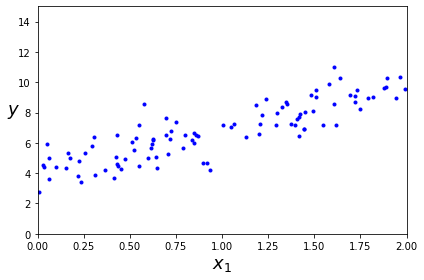

In [4]:
plt.plot( X, Y, 'b.' )
plt.xlabel( '$x_1$', fontsize = 18 )
plt.ylabel( '$y$', rotation = 0, fontsize = 18 ) # label이 돌아가는지 안돌아가는지
plt.axis( [ 0, 2, 0, 15 ] ) # [:2] -> X Range, [2:] -> Y Range
my_save_fig( 'Generated_data_plot' )
plt.show()

# 4.1.1 Normal Equation

## Linear Regression with Normal Equation

In [5]:
X_b = np.c_[np.ones( ( 100, 1 ) ), X ] # Column_stack, concatenate axis 1
X_b_t = X_b.T
theta_best = np.linalg.inv( X_b_t.dot( X_b ) ).dot( X_b_t ).dot( Y )

In [6]:
theta_best

array([[4.00129806],
       [2.87099163]])

In [7]:
X_new = np.array( [ [ 0 ], [ 2 ] ] )
X_new_b = np.c_[ np.ones( ( 2, 1 ) ), X_new ]
y_predict = X_new_b.dot( theta_best )

Save Figure :  Linear_Model_Predictions_Plot


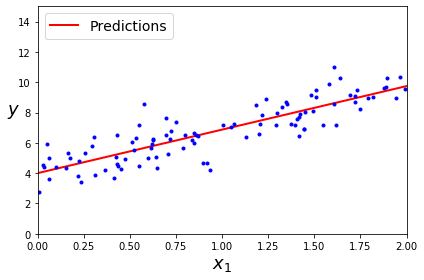

In [8]:
plt.plot( X_new, y_predict, 'r-', linewidth = 2, label = 'Predictions' )
plt.plot( X, Y, 'b.' )
plt.xlabel( '$x_1$', fontsize = 18 )
plt.ylabel( '$y$', rotation = 0, fontsize = 18 )
plt.legend( loc = 'upper left', fontsize = 14 )
plt.axis( [ 0, 2, 0, 15 ] )
my_save_fig( 'Linear_Model_Predictions_Plot' )
plt.show()

## Linear Regression with Scikit-learn
> Pseduinverse matrix

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression( )
lin_reg.fit( X, Y )
lin_reg.intercept_, lin_reg.coef_ # intercept -> bias, coef -> weight

(array([4.00129806]), array([[2.87099163]]))

In [10]:
lin_reg.predict( X_new )

array([[4.00129806],
       [9.74328133]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq( X_b, Y, rcond = 1e-6 )
theta_best_svd

array([[4.00129806],
       [2.87099163]])

In [12]:
np.linalg.pinv( X_b ).dot( Y )

array([[4.00129806],
       [2.87099163]])

# 4.2 Gradient Descent

## 4.2.1 Batch Gradient Descent

In [13]:
eta = 0.1 # Learning Rate
n_iterations = 1000
m = 100 # Number of Data

theta = np.random.randn( 2, 1 ) # Random Initialization

for iteration in range( 1000 ):
    gradients = 2 / m * X_b_t.dot( X_b.dot( theta ) - Y )
    theta = theta - eta * gradients

In [14]:
theta

array([[4.00129806],
       [2.87099163]])

In [15]:
X_new_b.dot( theta )

array([[4.00129806],
       [9.74328133]])

In [16]:
theta_path_bgd = [ ]

def plot_gradient_descent( theta, eta, theta_path = None ):
    m = len( X_b )
    plt.plot( X, Y, 'b.' )
    n_iterations = 1000
    for iteration in range( n_iterations ):
        if iteration < 10:
            y_predict = X_new_b.dot( theta )
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot( X_new, y_predict, style )
        gradients = 2 / m * X_b_t.dot( X_b.dot( theta ) - Y )
        theta = theta - eta * gradients
        
        if theta_path is not None:
            theta_path.append( theta )
    plt.xlabel( '$x_1$', fontsize = 18 )
    plt.axis( [ 0, 2, 0, 15 ] )
    plt.title( r'$\eta = {}$'.format( eta ), fontsize = 16 )

Save Figure :  Gradient_Descent_Plot


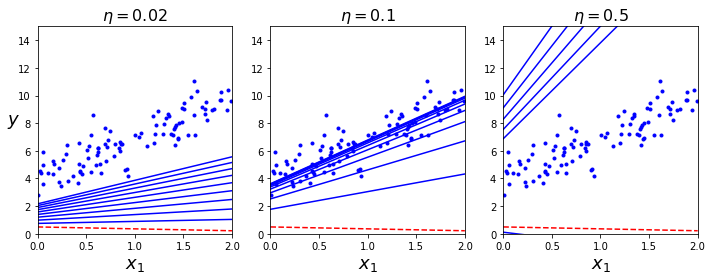

In [17]:
np.random.seed( 42 )
theta = np.random.randn( 2, 1 ) # Random Initialization

plt.figure( figsize = ( 10, 4 ) )
plt.subplot( 131 ); plot_gradient_descent( theta, eta = 0.02 )
plt.ylabel( '$y$', rotation = 0, fontsize = 18 )
plt.subplot( 132 ); plot_gradient_descent( theta, eta = 0.1, theta_path = theta_path_bgd )
plt.subplot( 133 ); plot_gradient_descent( theta, eta = 0.5 )

my_save_fig( 'Gradient_Descent_Plot' )
plt.show()

## 4.2.2 Stochastic Gradient Descent

In [18]:
theta_path_sgd = [ ]
m = len( X_b )
np.random.seed( 42 )

Save Figure :  SGD_Plot


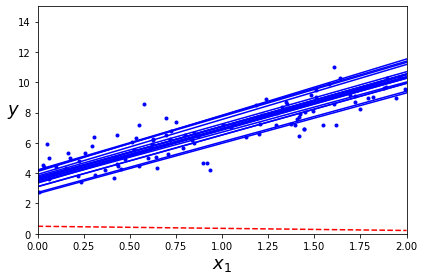

In [19]:
n_epochs = 50
t0, t1 = 5, 50 # Learning Schedule Hyperparameter

def Learning_Schedule( t ):
    return ( t0 / ( t + t1 ) )

theta = np.random.randn( 2, 1 ) # Random Initialization

for epoch in range( n_epochs ):
    for i in range( m ):
        if ( epoch == 0 and i < 20 ):
            y_predict = X_new_b.dot( theta )
            style = 'b-' if i > 0 else 'r--'
            plt.plot( X_new, y_predict, style )
        random_index = np.random.randint( m )
        xi = X_b[random_index : random_index + 1]
        yi = Y[random_index : random_index + 1 ]
        
        gradients = 2 * xi.T.dot( xi.dot( theta ) - yi )
        eta = Learning_Schedule( epoch * m + i )
        theta = theta - eta * gradients
        theta_path_sgd.append( theta )

plt.plot( X, Y, 'b.' )
plt.xlabel( '$x_1$', fontsize = 18 )
plt.ylabel( '$y$', rotation = 0, fontsize = 18 )
plt.axis( [ 0, 2, 0, 15 ] )
my_save_fig( 'SGD_Plot' )
plt.show()

## SGD with Scikit-Learn

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor( max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1, random_state = 42 )
sgd_reg.fit( X, Y.ravel() )

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.99280553]), array([2.89202903]))

# Mini-batch Gradient Descent

In [22]:
theta_path_mgd = [ ]

n_iterations = 50
minibatch_size = 20

np.random.seed( 42 )
theta = np.random.randn( 2, 1 )

t0, t1 = 200, 1000
def Learning_Schedule( t ):
    return ( t0 / ( t + t1 ) )

t = 0
for epoch in range( n_iterations ):
    shuffled_indices = np.random.permutation( m )
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = Y[shuffled_indices]
    for i in range( 0, m, minibatch_size ):
        t += 1

        xi = X_b_shuffled[i : i + minibatch_size]
        yi = y_shuffled[i : i + minibatch_size]
        
        gradients = 2 / minibatch_size * xi.T.dot( xi.dot( theta ) - yi )
        eta = Learning_Schedule( t )
        theta = theta - eta * gradients
        theta_path_mgd.append( theta )

In [23]:
theta

array([[3.98727476],
       [2.87386875]])

In [24]:
theta_path_bgd = np.array( theta_path_bgd )
theta_path_sgd = np.array( theta_path_sgd )
theta_path_mgd = np.array( theta_path_mgd )

In [25]:
len( theta_path_bgd ), len( theta_path_sgd ), len( theta_path_mgd )

(1000, 5000, 250)

Save Figure :  Gradient_Descent_Paths_Plot


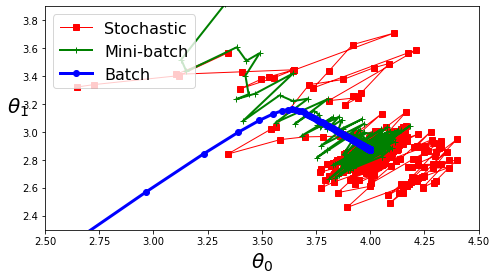

In [26]:
plt.figure( figsize = ( 7, 4 ) )
plt.plot( theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth = 1, label = 'Stochastic' )
plt.plot( theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth = 2, label = 'Mini-batch' )
plt.plot( theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth = 3, label = 'Batch' )

plt.legend( loc = 'upper left', fontsize = 16 )
plt.xlabel( r'$\theta_0$', fontsize = 20 )
plt.ylabel( r'$\theta_1$', fontsize = 20, rotation = 0 )
plt.axis( [ 2.5, 4.5, 2.3, 3.9 ] )
my_save_fig( 'Gradient_Descent_Paths_Plot' )
plt.show()

# 4.3 Polynomial Regression

In [27]:
np.random.seed( 42 )

In [28]:
m = 100
X = 6 * np.random.rand( m, 1 ) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn( m, 1 )

Save Figure :  Quadratic_Data_Plot


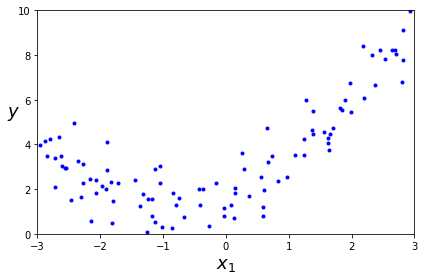

In [29]:
plt.plot( X, y, 'b.' )
plt.xlabel( '$x_1$', fontsize = 18 )
plt.ylabel( '$y$', rotation = 0, fontsize = 18 )
plt.axis( [ -3, 3, 0, 10 ] )
my_save_fig( "Quadratic_Data_Plot" )
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures( degree = 2, include_bias = False )
X_poly = poly_features.fit_transform( X )

In [31]:
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [32]:
lin_reg = LinearRegression()
lin_reg.fit( X_poly, y )
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Save Figure :  Quadratic_Predictions_Plot


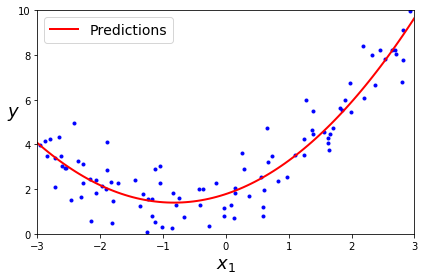

In [33]:
X_new = np.linspace( -3, 3, 100 ).reshape( 100, 1 )
X_new_poly = poly_features.transform( X_new )
y_new = lin_reg.predict( X_new_poly )

plt.plot( X, y, 'b.' )
plt.plot( X_new, y_new, 'r-', linewidth = 2, label = 'Predictions' )
plt.xlabel( '$x_1$', fontsize = 18 )
plt.ylabel( '$y$', rotation = 0, fontsize = 18 )
plt.legend( loc = 'upper left', fontsize = 14 )
plt.axis( [ -3, 3, 0, 10 ] )

my_save_fig( 'Quadratic_Predictions_Plot' )
plt.show()

# 4.4 Learning Curve

Save Figure :  High_Degree_Polynomial_Plot


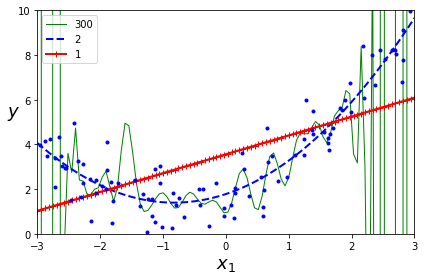

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

params = [ ( 'g-', 1, 300 ), ( 'b--', 2, 2 ), ( 'r-+', 2, 1 ) ]
for style, width, degree in params:
    polynomial_regression = Pipeline( [
        ( 'poly_features', PolynomialFeatures( degree = degree, include_bias = False ) ),
        ( 'std_scaler', StandardScaler( ) ),
        ( 'lin_reg', LinearRegression( ) )
    ])
    
    polynomial_regression.fit( X, y )
    y_newbig = polynomial_regression.predict( X_new )
    plt.plot( X_new, y_newbig, style, label = str( degree ), linewidth = width )

plt.plot( X, y, 'b.', linewidth = 3)
plt.legend( loc = 'upper left' )
plt.xlabel( '$x_1$', fontsize = 18 )
plt.ylabel( '$y$', rotation = 0, fontsize = 18 )
plt.axis( [ -3, 3, 0, 10 ] )
my_save_fig( 'High_Degree_Polynomial_Plot' )
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves( model, X, y ):
    X_train, X_val, y_train, y_val = train_test_split( X, y, test_size = 0.2, random_state = 10 )
    train_errors, val_errors = [ ], [ ]
    
    for m in range( 1, len( X_train ) ):
        model.fit( X_train[ : m], y_train[ : m] )
        y_train_predict = model.predict( X_train[ : m] )
        y_val_predict = model.predict( X_val )
        train_errors.append( mean_squared_error( y_train[ : m], y_train_predict ) )
        val_errors.append( mean_squared_error( y_val, y_val_predict ) )

    plt.plot( np.sqrt( train_errors ), 'r-+', linewidth = 2, label = 'train' )
    plt.plot( np.sqrt( val_errors), 'b-', linewidth = 3, label = 'validation' )
    plt.legend( loc = 'upper right', fontsize = 14 )
    plt.xlabel( 'Training set size', fontsize = 14 )
    plt.ylabel( 'RMSE', fontsize = 14 )

Save Figure :  Underfitting_Learning_Curves_Plot


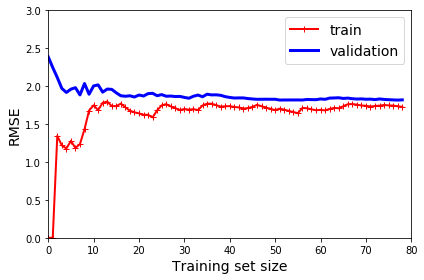

In [43]:
lin_reg = LinearRegression( )
plot_learning_curves( lin_reg, X, y )
plt.axis( [ 0, 80, 0, 3 ] )
my_save_fig( 'Underfitting_Learning_Curves_Plot' )
plt.show()

Save Figure :  Overfitting_Learning_Curves_Plot


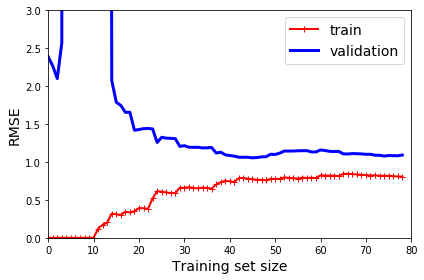

In [44]:
polynomial_regression = Pipeline( [
    ( 'poly_features', PolynomialFeatures( degree = 10, include_bias = False ) ),
    ( 'lin_reg', LinearRegression() )
])

plot_learning_curves( polynomial_regression, X, y )
plt.axis( [ 0, 80, 0, 3 ] )
my_save_fig( 'Overfitting_Learning_Curves_Plot' )
plt.show()